In [1]:
#data import and cleanup.
import kagglehub
from kagglehub import KaggleDatasetAdapter
file_path = "matches.csv"
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "saurav9786/indian-premier-league-match-analysis",
  file_path )
df.drop(columns='umpire3',inplace=True)
df['city']=df['city'].fillna('in India')
df['player_of_match']=df['player_of_match'].fillna('Not Awarded')
df['winner']=df['winner'].fillna('Unknown')
df[['umpire1','umpire2']]=df[['umpire1','umpire2']].fillna('Not Allotted')
import pandas as pd
df['date']=pd.to_datetime(df['date'],format="mixed",dayfirst=True)
df['month_of_match']= df['date'].dt.month_name()

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#names of teams were changed across season
team_mapping = {
    "Delhi Daredevils": "Delhi Capitals",
    "Rising Pune Supergiant": "Pune Franchise",
    "Rising Pune Supergiants": "Pune Franchise",
    "Pune Warriors": "Pune Franchise",
    "Gujarat Lions": "Gujarat Titans"
}

df['team1'] = df['team1'].replace(team_mapping)
df['team2'] = df['team2'].replace(team_mapping)
df['winner'] = df['winner'].replace(team_mapping)
df['toss_winner'] = df['toss_winner'].replace(team_mapping)

Text(0.5, 0.98, 'IPL teams win count in each season')

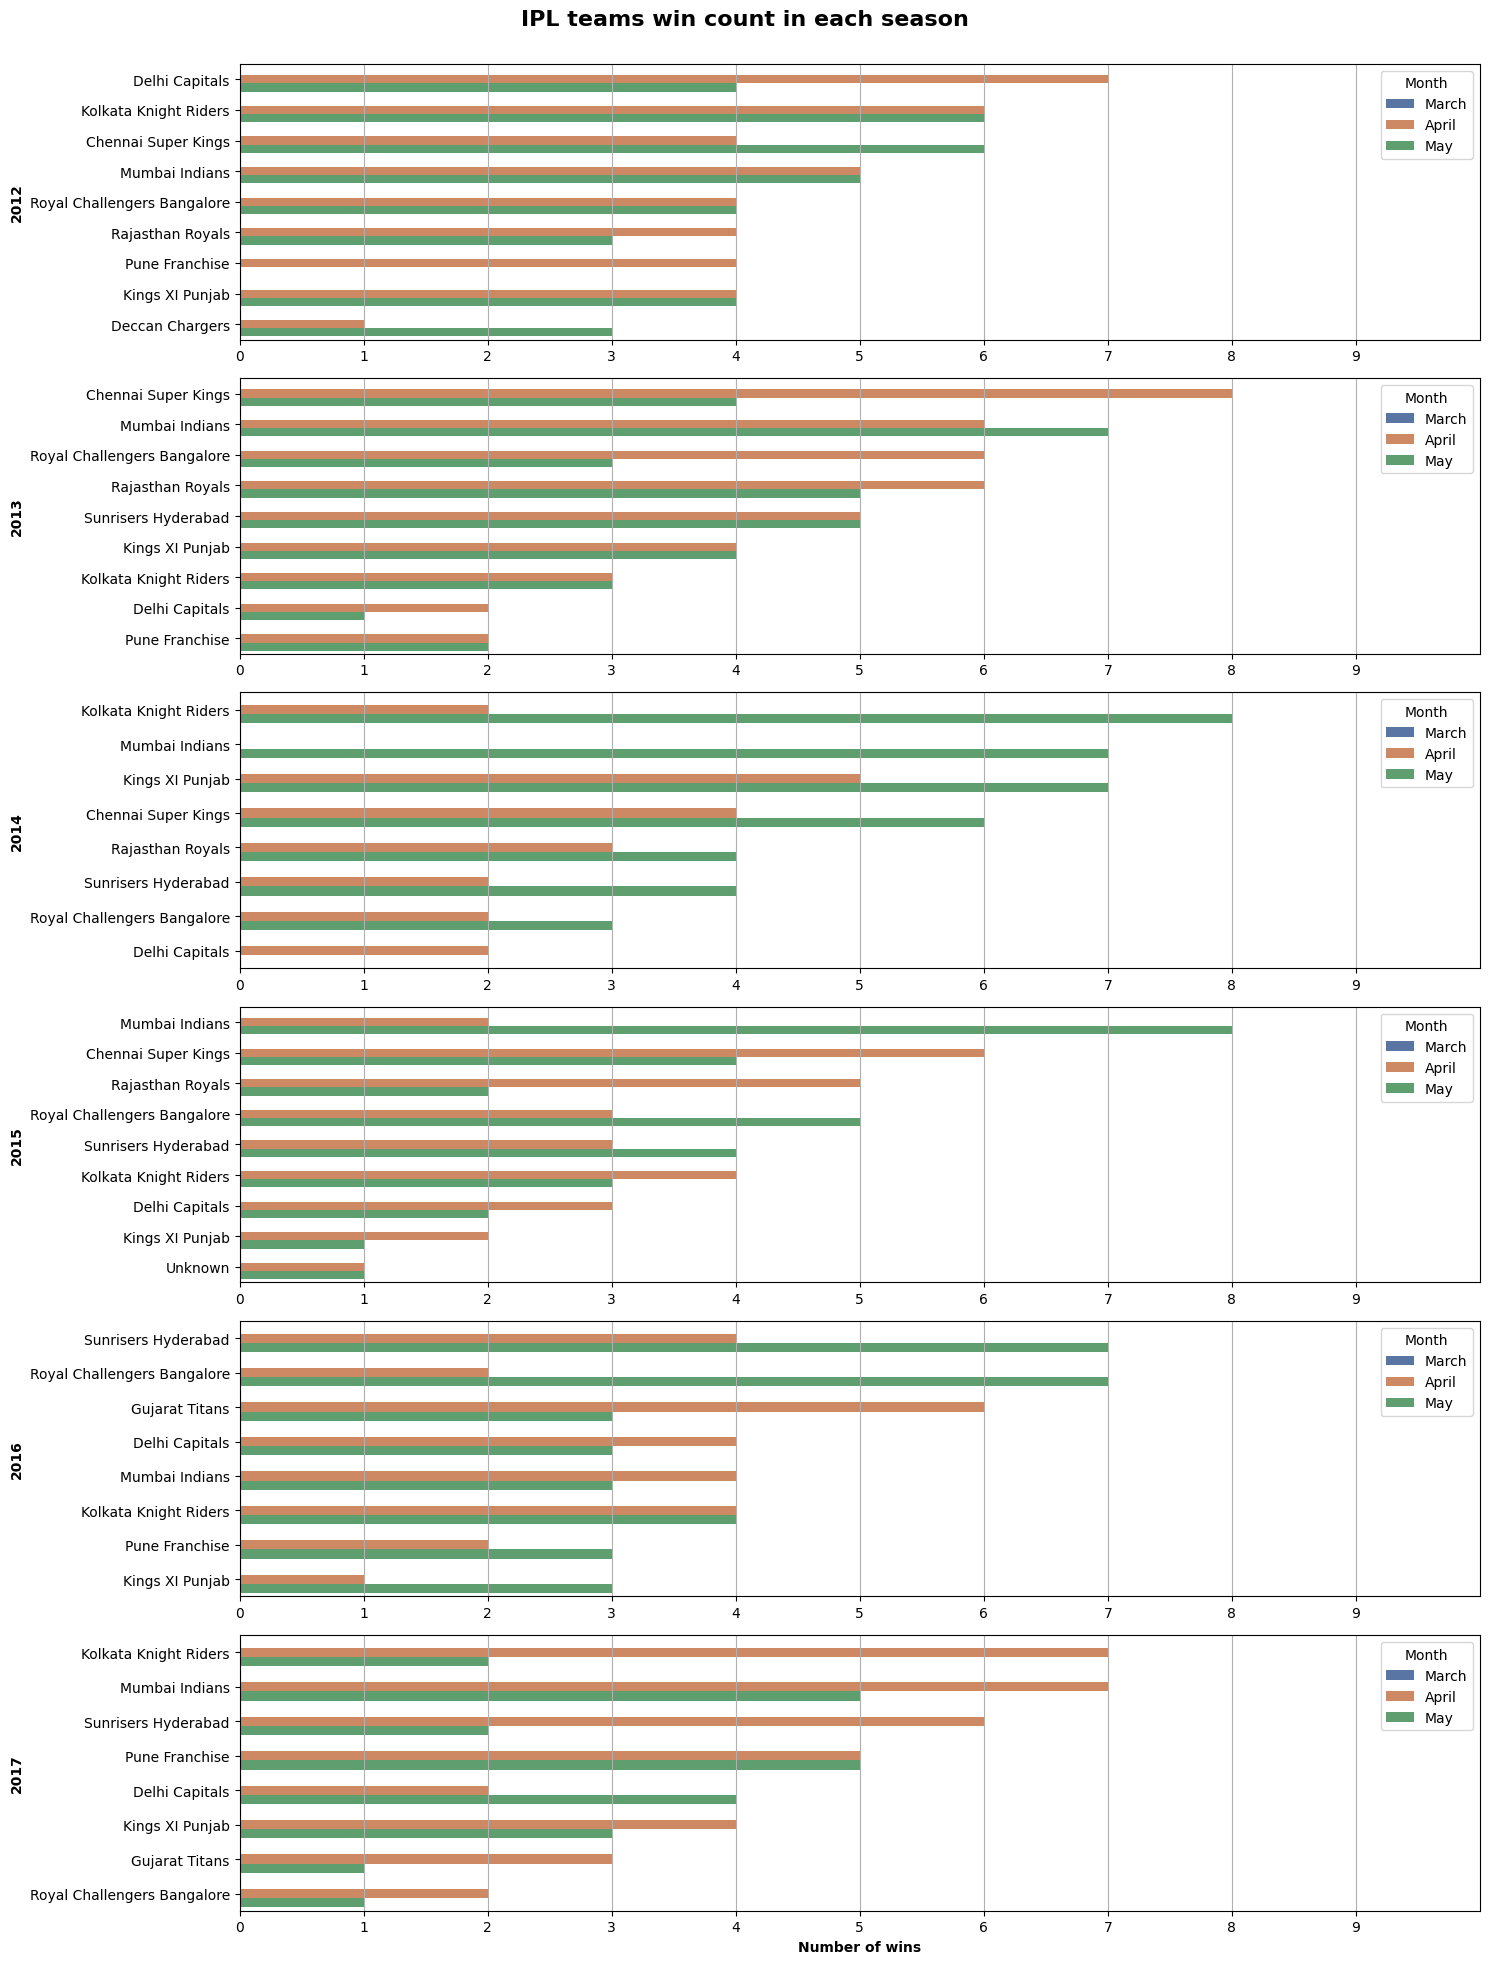

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#new dataframe for plot
df_grouped=(
             df.groupby(['winner','season','month_of_match'])['winner']
             .count()
             .reset_index(name='win_count')
             .sort_values('win_count',ascending= False)
)
seasons=np.sort(df_grouped['season'].unique())[4:]
month_order = ['March', 'April', 'May']
#plotting season winners using seaborn
fig,ax=plt.subplots(len(seasons),1,figsize=(15,20))
for i,season in enumerate(seasons):
     df_plot=df_grouped[df_grouped['season']==season]
     sns.barplot(
                 data=df_plot,
                 y='winner',
                 x='win_count',
                 hue='month_of_match',
                 hue_order=month_order,
                 palette='deep',
                 ax=ax[i]
                 )
     #formatting sublots
     ax[i].set_ylabel(season,fontweight='bold')
     if i == len(seasons)-1:
          ax[i].set_xlabel('Number of wins',fontweight='bold')
     else:
          ax[i].set_xlabel('')
     ax[i].legend(loc='upper right',title='Month')
     ax[i].set_xlim(0,10)
     ax[i].grid(axis='x')
     ax[i].set_xticks(range(0,10,1))

fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle('IPL teams win count in each season',fontsize=16,fontweight='bold')

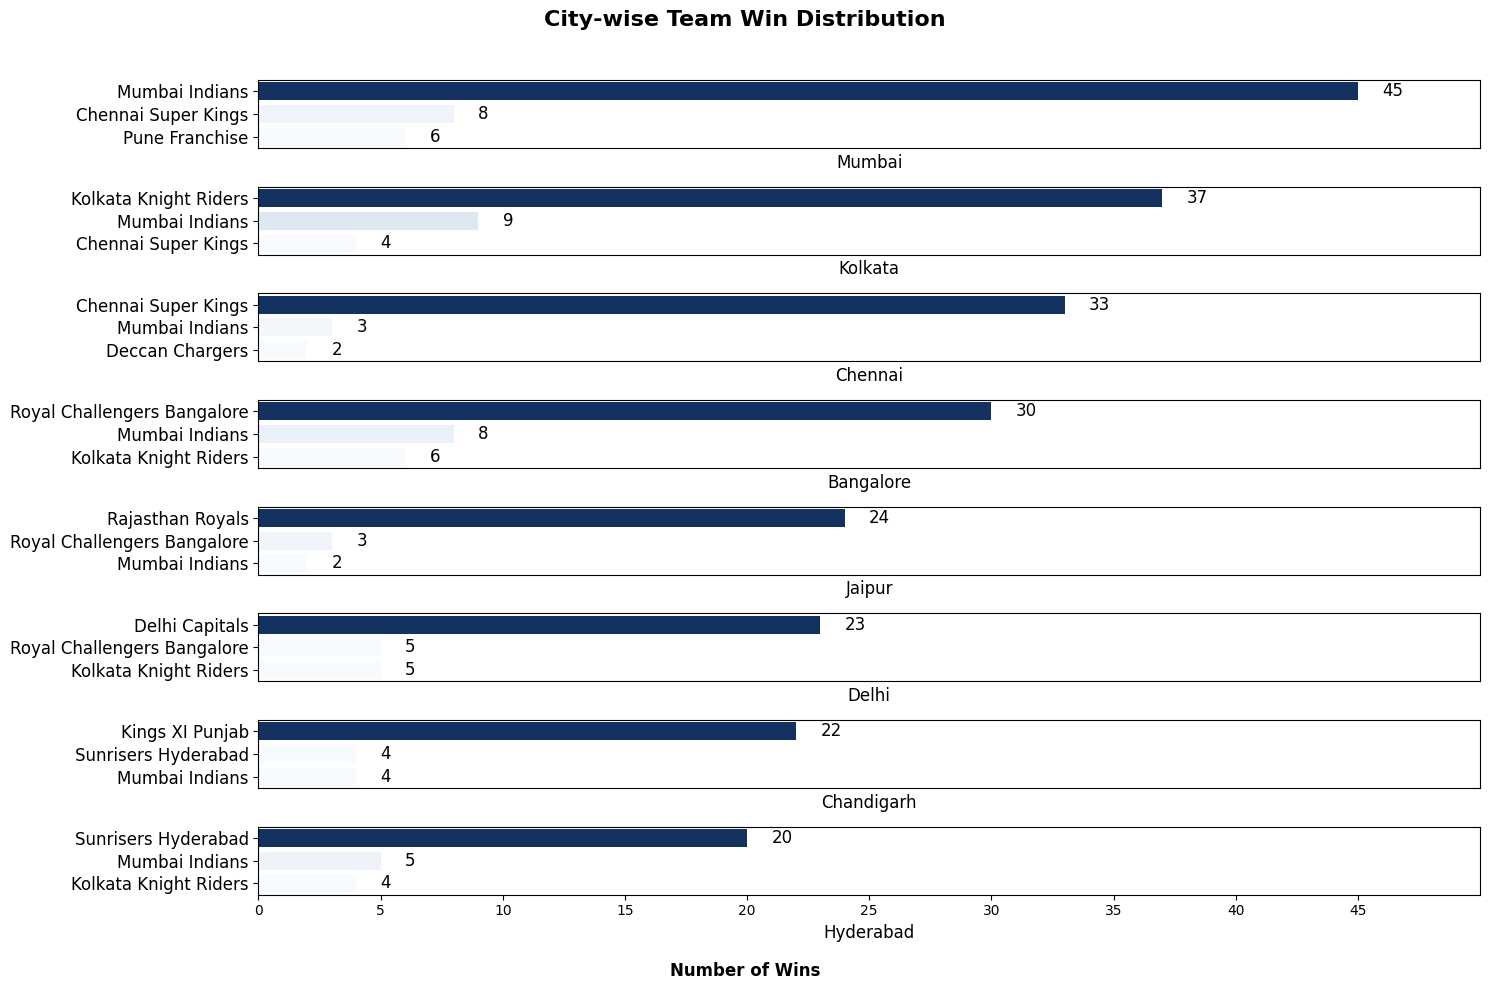

In [21]:
#Creating dataframe displaying city and winner count
df_city_winner = (
    df.groupby(['city', 'winner'])
      .size()
      .reset_index(name='win_count')
      .sort_values('win_count', ascending=False)
)
top_cities = df_city_winner['city'].unique()[:8]
#reducing rows to be looped through
df_city_winner = df_city_winner[df_city_winner['city'].isin(top_cities)]
fig, ax = plt.subplots(len(top_cities), 1, figsize=(15,10))
#plotting top 3 winners for each city
for i, city in enumerate(top_cities):
    df_plot = df_city_winner[df_city_winner['city'] == city]
    sns.barplot(
        data=df_plot.head(3),
        y='winner',
        x='win_count',
        hue='win_count',
        palette='Blues',
        ax=ax[i],
        legend=False
    )
    #formatting plots
    ax[i].set_ylabel('')
    ax[i].set_yticks(df_plot['winner'].head(3))
    ax[i].set_yticklabels(df_plot['winner'].head(3),fontsize=12)
    for u,v in enumerate(df_plot['win_count'].head(3)):
         ax[i].text(v+1,u,v,fontsize=12,va='center')
    if i == len(top_cities) - 1:
        ax[i].set_xticks(range(0,50,5))
    else:
        ax[i].set_xticks([])
    ax[i].set_xlabel(city,fontsize=12)
    ax[i].set_xlim(0,50)
fig.supxlabel('Number of Wins',fontweight='bold')
fig.suptitle('City-wise Team Win Distribution', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


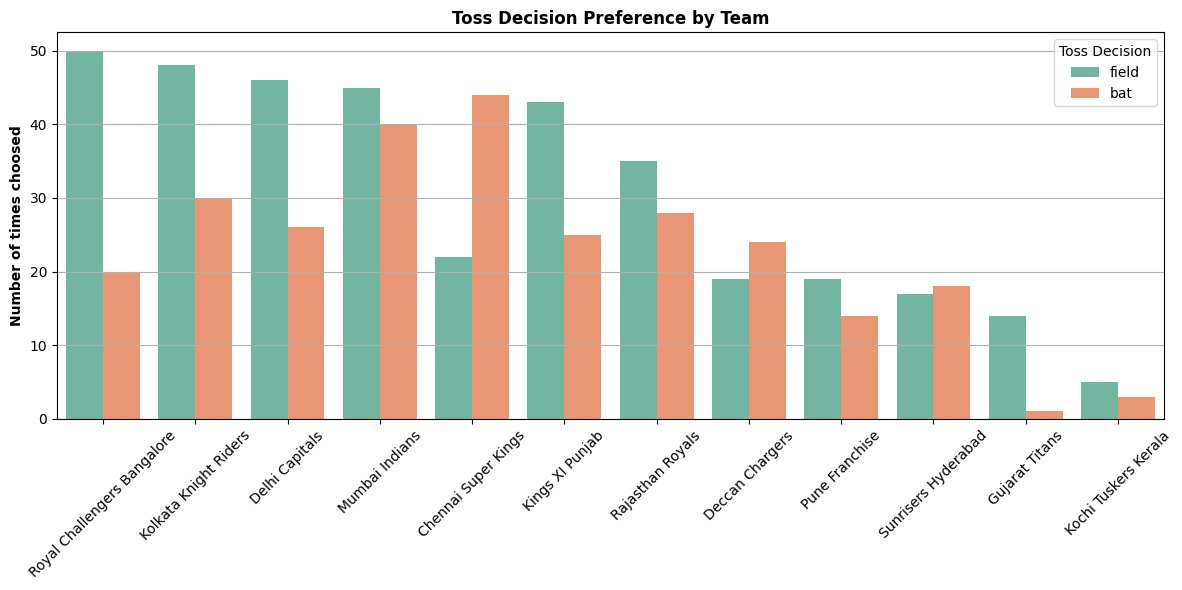

In [24]:
#Creting dataframe for team wise decisions after winning toss 
df_toss_decision = (
    df.groupby(['toss_winner', 'toss_decision'])
      .size()
      .reset_index(name='count')
      .sort_values('count',ascending=False)
)
fig, ax = plt.subplots(figsize=(12, 6))
#plotting 
sns.barplot(
    data=df_toss_decision,
    x='toss_winner',
    y='count',
    hue='toss_decision',
    palette='Set2',
    ax=ax
)
#formatting
ax.set_title('Toss Decision Preference by Team', fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Number of times choosed', fontweight='bold')
ax.grid(axis='y')
ax.legend(title='Toss Decision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


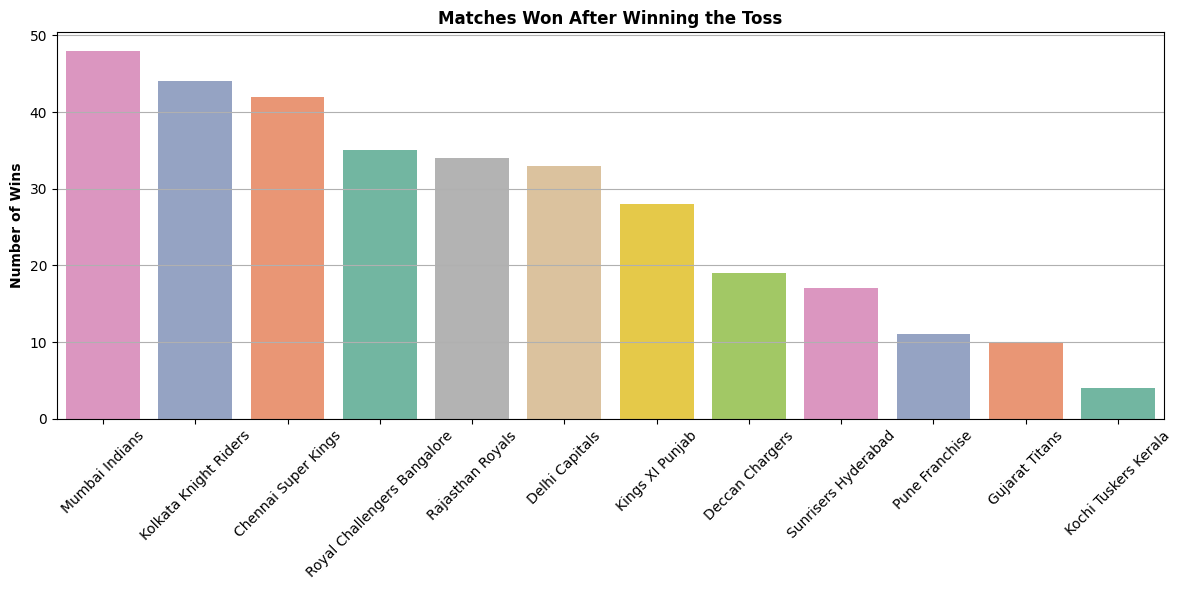

In [25]:
df_toss_match = (
    df.groupby(['toss_winner', 'winner'])
      .size()
      .reset_index(name='win_count')
      .sort_values('win_count', ascending=False)
)
df_toss_match = df_toss_match[df_toss_match['toss_winner'] == df_toss_match['winner']]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_toss_match,
    x='winner',
    y='win_count',
    hue='win_count',
    palette='Set2',
    legend=False
)

plt.title('Matches Won After Winning the Toss', fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Wins', fontweight='bold')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


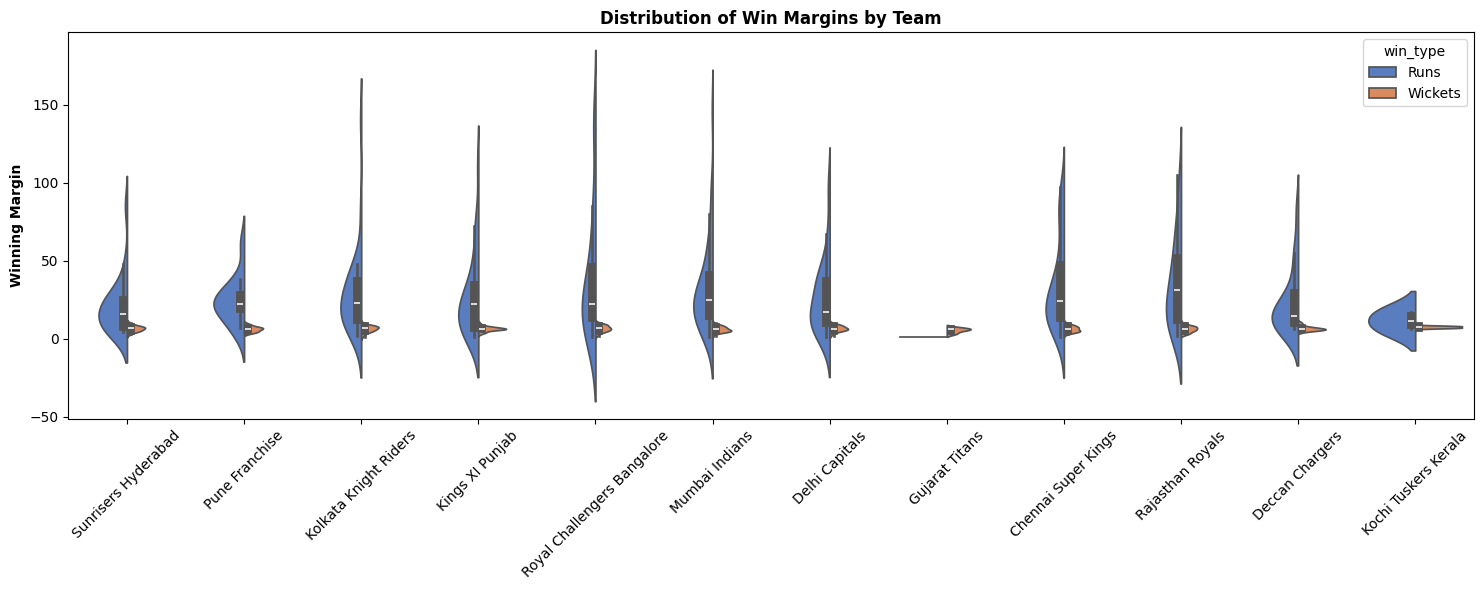

In [26]:
df_win_margin = df[
    (df['win_by_runs'] > 0) | (df['win_by_wickets'] > 0)
].copy()
#creating new cols for number of runs/wickets and win by runs/wickets
df_win_margin['margin'] = np.where(
    df_win_margin['win_by_runs'] > 0,
    df_win_margin['win_by_runs'],
    df_win_margin['win_by_wickets']
)
df_win_margin['win_type'] = np.where(
    df_win_margin['win_by_runs'] > 0, 'Runs', 'Wickets'
)
df_win_margin.sort_values('margin', ascending=False)
#using voilin plot to show dominance of runs/wickets
plt.figure(figsize=(15, 6))
sns.violinplot(
    data=df_win_margin,
    x='winner',
    y='margin',
    hue='win_type',
    split=True,
    palette='muted'
)
plt.title('Distribution of Win Margins by Team', fontweight='bold')
plt.xlabel('')
plt.ylabel('Winning Margin', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


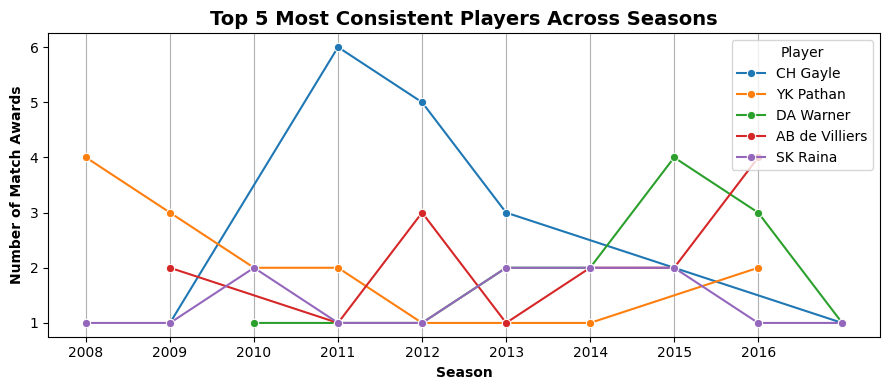

In [27]:
#player of match winners in ipl 2008-2017 seasons 

top_players=df['player_of_match'].value_counts().head(5).index
#dataframe of those players
df_player_season = (
    df[df['player_of_match'].isin(top_players)]
      .groupby(['season', 'player_of_match'])
      .size()
      .reset_index(name='award_count')
      .sort_values('award_count', ascending=False)
)
plt.figure(figsize=(9,4))
#plotting
sns.lineplot(
    data=df_player_season,
    x='season',
    y='award_count',
    hue='player_of_match',
    marker='o'
)
plt.title('Top 5 Most Consistent Players Across Seasons',fontsize=14,fontweight='bold')
plt.xlabel('Season', fontweight='bold')
plt.ylabel('Number of Match Awards', fontweight='bold')
plt.xticks(range(2008,2017,1))
plt.grid(axis='x')
plt.legend(title='Player')
plt.tight_layout()
plt.show()
